In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_path = "/content/gdrive/MyDrive/Hydrogenase/MachineLearning/JNs/"
else:
    file_path = "./"

%matplotlib inline

In [3]:
# Define the categories
bin_cate = ['Primary', 'Secondary']

# Define the color palette (Primary: Blue, Secondary: Red)
bin_palette = sns.color_palette(["#1F449C", "#F05039"])
bin_colors = {'Primary': bin_palette[0], 'Secondary': bin_palette[1]}

# Set up the plotting environment
sns.set_style("ticks")
plt.rcParams.update({'font.size': 18})  # Update the font size globally

In [6]:
data = pd.read_csv(file_path+'Df-H2ase-CO.csv')

# Split the data into features (X) and target variable (y)
X = data.drop(["Trajectory", "Frame", "Binary", 'Pathway-new'], axis=1)  # Features
y = data['Pathway-new']  # Target variable

# Split the data into training & validation+test set (70:30)
_, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=1)

# Split the validation & test subset into validation and test sets equally
# features not needed
_, _, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=1)

# Load and preprocess the H2 dataset
data_H2 = pd.read_csv(file_path+'Df-H2ase-H2.csv')
y_H2 = data_H2['Pathway-new']  # Target variable

# Load and preprocess the O2 dataset
data_O2 = pd.read_csv(file_path+'Df-H2ase-O2.csv')
y_O2 = data_O2['Pathway-new']

# Load and preprocess the NewCO dataset
data_NewCO = pd.read_csv(file_path+'Mdg-H2ase-CO.csv')
y_NewCO = data_NewCO['Pathway-new']

In [7]:
# convert the multiclass labels to binary labels
def multiclass_to_binary(labels):
    bin_labels = ['Primary' if t in ['T1', 'T2', 'T7'] else 'Secondary' for t in labels.to_list()]
    bin_labels = pd.Series(bin_labels, index=labels.index, name='Binary')
    return bin_labels

[bin_train, bin_val, bin_test, bin_H2, bin_O2, bin_NewCO] = [multiclass_to_binary(labels) for labels in [y_train, y_val, y_test, y_H2, y_O2, y_NewCO]]

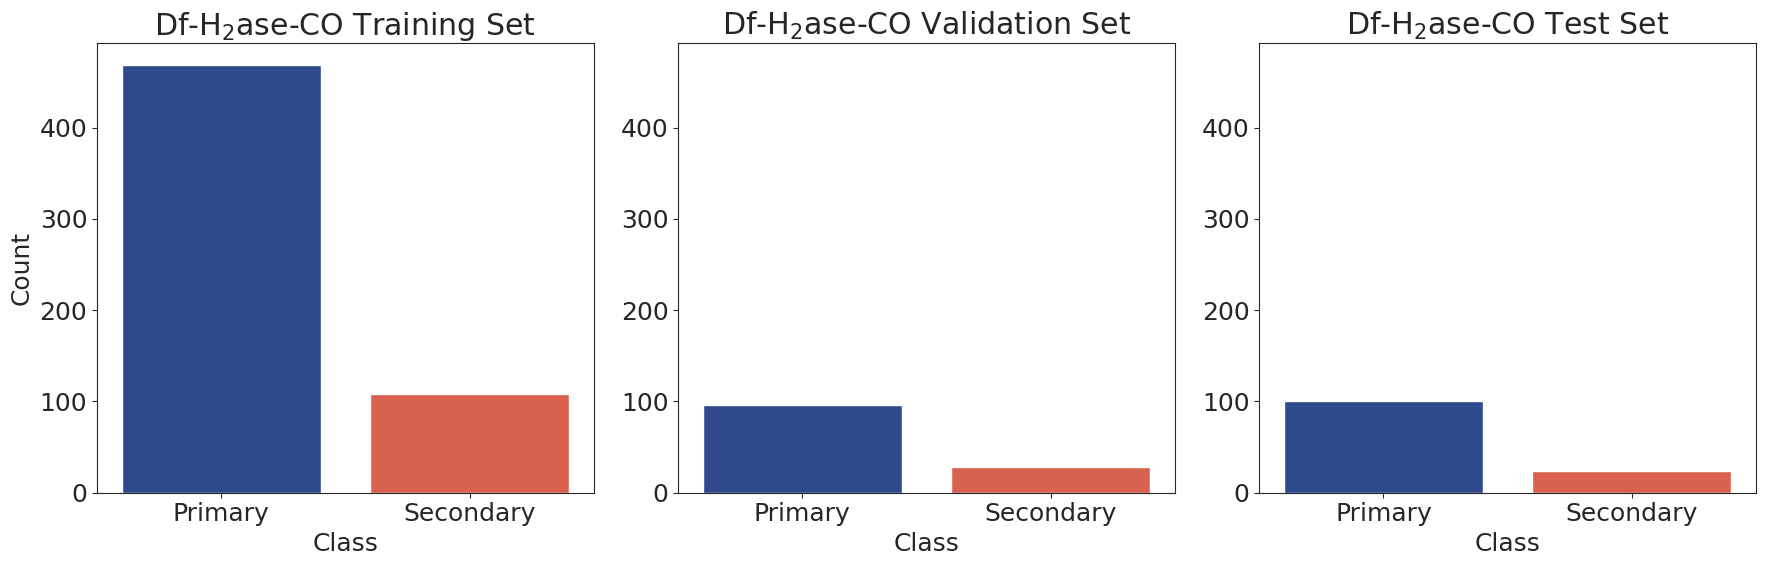

In [10]:
# Plotting the distribution of classes in train, validation, and test sets
fig_bin_DfCO, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18, 6))

sns.countplot(x=bin_train, hue=bin_train, order=bin_cate, palette=bin_colors, legend=False, ax=axes[0])
axes[0].set_title('Df-H$_2$ase-CO Training Set')

sns.countplot(x=bin_val, hue=bin_val, order=bin_cate, palette=bin_colors, legend=False, ax=axes[1])
axes[1].set_title('Df-H$_2$ase-CO Validation Set')

sns.countplot(x=bin_test, hue=bin_test, order=bin_cate, palette=bin_colors, legend=False, ax=axes[2])
axes[2].set_title('Df-H$_2$ase-CO Test Set')

for i in range(3):
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Count')
    axes[i].yaxis.set_tick_params(labelbottom=True)

plt.tight_layout()
plt.savefig(file_path+'Distribution_Binary_Df_H2se_CO.png', dpi=300, bbox_inches='tight')
plt.show()

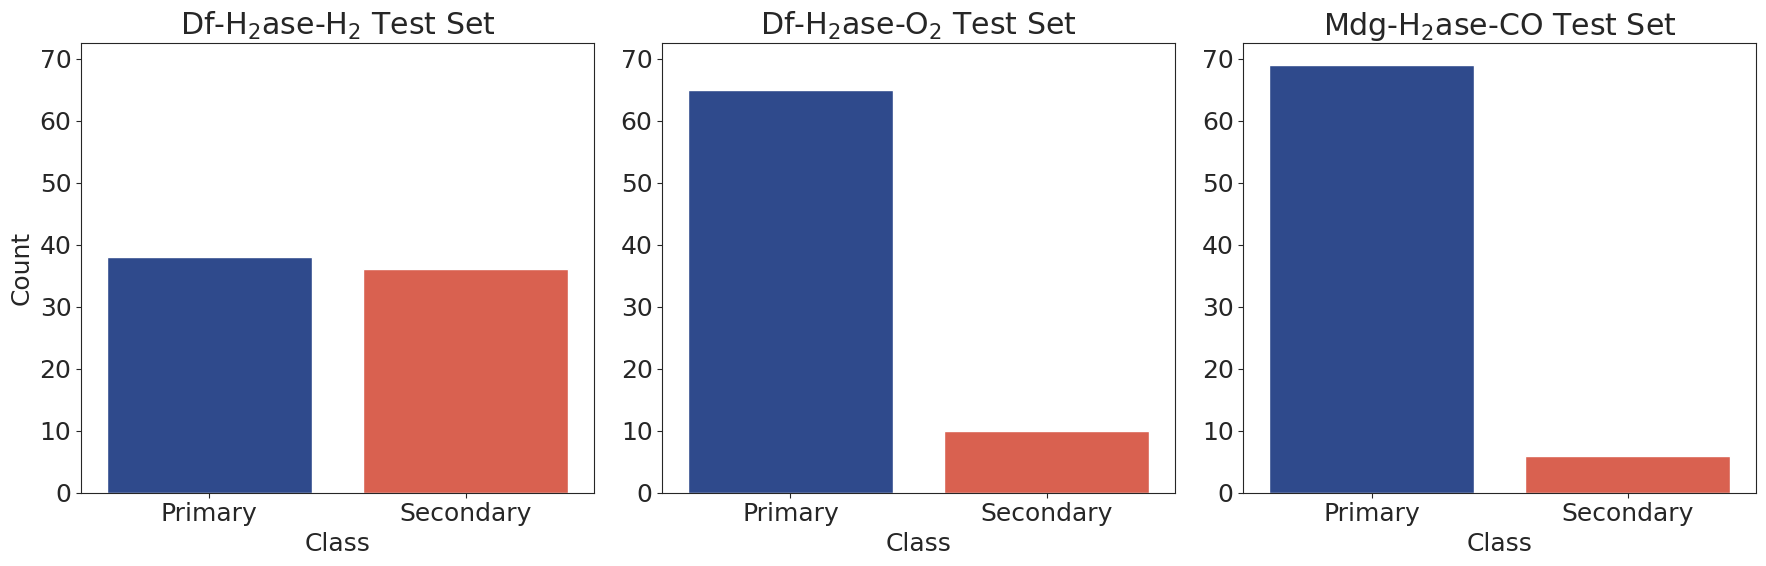

In [11]:
fig_mc_other, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18,6))

sns.countplot(x=bin_H2, hue=bin_H2, order=bin_cate, palette=bin_colors,
              legend=False, ax=axes[0])
axes[0].set_title('Df-H$_2$ase-H$_2$ Test Set')
sns.countplot(x=bin_O2, hue=bin_O2, order=bin_cate, palette=bin_colors,
              legend=False, ax=axes[1])
axes[1].set_title('Df-H$_2$ase-O$_2$ Test Set')
sns.countplot(x=bin_NewCO, hue=bin_NewCO, order=bin_cate, palette=bin_colors,
              legend=False, ax=axes[2])
axes[2].set_title('Mdg-H$_2$ase-CO Test Set')

for i in range(3):
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Count')
    axes[i].yaxis.set_tick_params(labelbottom=True)

plt.tight_layout()
plt.savefig(file_path+'Distribution_Binary_other_test_sets.png', dpi=300, bbox_inches='tight')
plt.show()

       Class  Df-H2ase-CO-train  Df-H2ase-CO-validation  Df-H2ase-CO-test  \
0    Primary                469                      96               100   
1  Secondary                108                      28                24   

   Df-H2ase-H2  Df-H2ase-O2  Mdg-H2ase-CO  
0           38           65            69  
1           36           10             6  


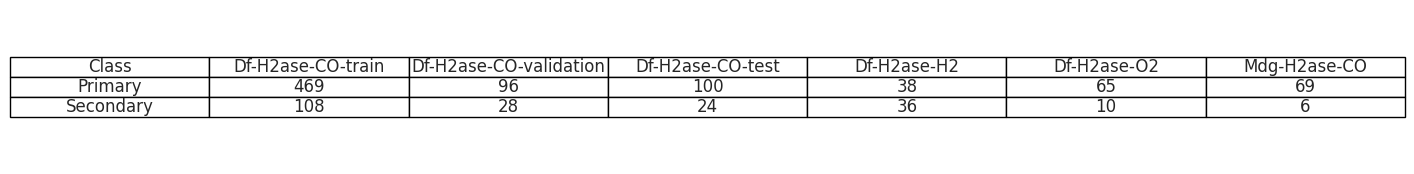

In [13]:
# Calculate the class distributions
dist_H2_bin = bin_H2.value_counts().sort_index()
dist_O2_bin = bin_O2.value_counts().sort_index()
dist_NewCO_bin = bin_NewCO.value_counts().sort_index()
dist_train_bin = bin_train.value_counts().sort_index()
dist_val_bin = bin_val.value_counts().sort_index()
dist_test_bin = bin_test.value_counts().sort_index()

# Combine these distributions into a single DataFrame
bin_distribution_df = pd.DataFrame({
    'Class': bin_cate,
    'Df-H2ase-CO-train': dist_train_bin.reindex(bin_cate, fill_value=0),
    'Df-H2ase-CO-validation': dist_val_bin.reindex(bin_cate, fill_value=0),
    'Df-H2ase-CO-test': dist_test_bin.reindex(bin_cate, fill_value=0),
    'Df-H2ase-H2': dist_H2_bin.reindex(bin_cate, fill_value=0),
    'Df-H2ase-O2': dist_O2_bin.reindex(bin_cate, fill_value=0),
    'Mdg-H2ase-CO': dist_NewCO_bin.reindex(bin_cate, fill_value=0),
}).reset_index(drop=True)

# Display the DataFrame as a table
print(bin_distribution_df)

# If you want to display the table as an image
plt.figure(figsize=(15, 2))
plt.axis('off')
table = plt.table(cellText=bin_distribution_df.values, colLabels=bin_distribution_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()

